# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
#import openweathermapy as ow
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
#with open(output_data_file) as cities_file:
    #cities_reader = csv.reader(cities_file)
   # cities = [city[0] for city in cities_reader]
   # weather_data = [ow.get_current(city, **settings) for city in cities]

    # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [4]:
cities_df = pd.DataFrame({"city" : cities})
cities_df["Lat"] = ""
cities_df["Lon"] = ""
cities_df["Wind Speed"] = ""
cities_df["Humidity"] = ""
cities_df["Temperature"] = ""
cities_df["Cloud Cover"] = ""
cities_df.head()

,city,Lat,Lon,Wind Speed,Humidity,Temperature,Cloud Cover
0,mataura,,,,,,
1,cape town,,,,,,
2,nha trang,,,,,,
3,atambua,,,,,,
4,trogir,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:

base_url ="http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID"
for index, row in cities_df.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["city"], api_key)
    response = requests.get(target_url).json()
    #cities_df.set_value(index, "Lat", response["coord"]["lat"])
    #cities_df.set_value(index, "Lon", response["coord"]["lon"])
    #cities_df.set_value(index, "Temperature", response["main"]["temp"])
    try:     
        cities_df.set_value(index, "Lat", response["coord"]["lat"])
        cities_df.set_value(index, "Lon", response["coord"]["lon"])
        cities_df.set_value(index, "Humidity", response["main"]["humidity"])
        cities_df.set_value(index, "Temperature", response["main"]["temp_max"])
        cities_df.set_value(index, "Wind Speed", response["wind"]["speed"])
        cities_df.set_value(index, "Cloud Cover", response["clouds"]["all"])
           
    except:
        print("Missing details... skip.")
        
    

/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/anaconda3/envs/myenv/lib/python3.6/site-p

http://api.openweathermap.org/data/2.5/weather?q=mataura&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=cape town&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=nha trang&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=atambua&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=trogir&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=georgetown&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=east london&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=salem&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e

http://api.openweathermap.org/data/2.5/weather?q=bucerias&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=richards bay&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=thompson&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=castro&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=sitka&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=geraldton&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=hasaki&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4

http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=koshurnikovo&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=shache&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=liverpool&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
Missing details... skip.
http://api.openweathermap.org/data/2.5/weather?q=saleaula&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=yulara&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
Missing details... skip.
http://api.openweathermap.org/data/2.5/weather?q=vaitupu&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=mogadishu&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?q=lasa&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=nemuro&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=mabaruma&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=saint-joseph&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
Missing details... skip.
http://api.openweathermap.org/data/2.5/weather?q=bolshegrivskoye&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=provideniya&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
Missing details... skip.
http://api.openweathermap.org/data/2.5/weather?q=karamea&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=marsa matruh&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weat

http://api.openweathermap.org/data/2.5/weather?q=ambon&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=tual&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=oga&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
Missing details... skip.
http://api.openweathermap.org/data/2.5/weather?q=blonduos&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=luderitz&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=tilichiki&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=krasnoyarskiy&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=san cristobal&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=beyneu&units=IMPERIAL&appid=de8

http://api.openweathermap.org/data/2.5/weather?q=lata&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=emba&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
Missing details... skip.
http://api.openweathermap.org/data/2.5/weather?q=nagornyy&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=bocaiuva&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=viedma&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=erenhot&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=peniche&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=marienburg&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
Missing details... skip.
http://api.openweathermap.org/data/2.5/weather?q=kamenskoye&unit

http://api.openweathermap.org/data/2.5/weather?q=port keats&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=changde&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=bonthe&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=tabat&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
Missing details... skip.
http://api.openweathermap.org/data/2.5/weather?q=marcona&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=japura&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=raglan&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=yuncheng&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=hambantota&units=IMPERIAL&appid=de8f8a2

http://api.openweathermap.org/data/2.5/weather?q=kothapet&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=alcains&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=natal&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=heinola&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=san juan&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=eskil&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=marzuq&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=thongwa&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=gamboma&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http

Missing details... skip.
http://api.openweathermap.org/data/2.5/weather?q=odweyne&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=swiecie&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=trinidad&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=hamilton&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=kamaishi&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=loa janan&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
Missing details... skip.
http://api.openweathermap.org/data/2.5/weather?q=pemangkat&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=gwanda&units=IMPERIAL&appid=de8f8a24da42e1fb0732f88c4e3e70a3
http://api.openweathermap.org/data/2.5/weather?q=utevka&

In [6]:
cities_df.head()

,city,Lat,Lon,Wind Speed,Humidity,Temperature,Cloud Cover
0,mataura,-46.19,168.86,3.2,100,42.51,88
1,cape town,-33.93,18.42,8.05,38,89.6,0
2,nha trang,12.24,109.19,15.28,96,79.05,92
3,atambua,-9.11,124.89,5.88,100,77.34,0
4,trogir,43.52,16.25,12.75,73,69.8,40


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_df.to_csv('homeworkcitydata.csv')

In [8]:
cities_df.head()

,city,Lat,Lon,Wind Speed,Humidity,Temperature,Cloud Cover
0,mataura,-46.19,168.86,3.2,100,42.51,88
1,cape town,-33.93,18.42,8.05,38,89.6,0
2,nha trang,12.24,109.19,15.28,96,79.05,92
3,atambua,-9.11,124.89,5.88,100,77.34,0
4,trogir,43.52,16.25,12.75,73,69.8,40


In [9]:
cities_df.dtypes

city           object
Lat            object
Lon            object
Wind Speed     object
Humidity       object
Temperature    object
Cloud Cover    object
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

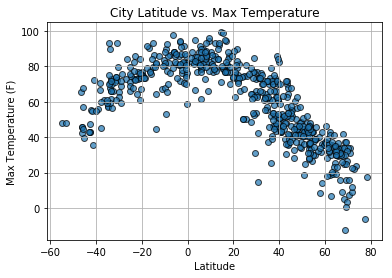

In [10]:
#cities_df["Lat"] = cities_df.astype(float)
cities_df["Lat"] = pd.to_numeric(cities_df['Lat'])
cities_df["Temperature"] = pd.to_numeric(cities_df['Temperature'])
#cities_df["Temperature"] = cities_df.astype(float)
#cities_df["Lat"] = pd.to_numeric(cities_df['Title'])
plt.scatter(cities_df["Lat"], cities_df["Temperature"], marker="o", alpha =.7, edgecolors='black')
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

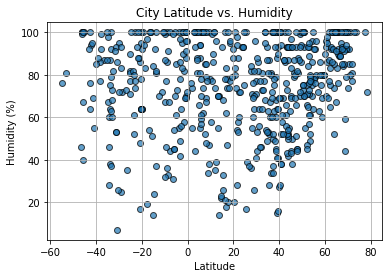

In [11]:
cities_df["Lat"] = pd.to_numeric(cities_df['Lat'])
cities_df["Cloud Cover"] = pd.to_numeric(cities_df['Humidity'])
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", alpha =.7, edgecolors='black')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

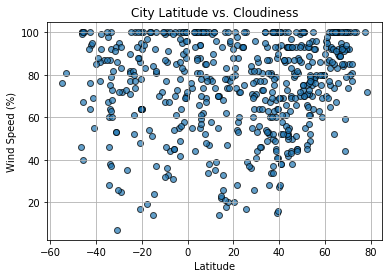

In [12]:
cities_df["Lat"] = pd.to_numeric(cities_df['Lat'])
cities_df["Cloud Cover"] = pd.to_numeric(cities_df['Cloud Cover'])
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", alpha =.7, edgecolors='black')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

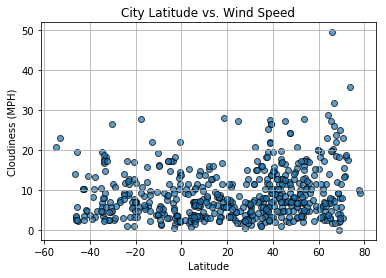

In [13]:
cities_df["Lat"] = pd.to_numeric(cities_df['Lat'])
cities_df["Wind Speed"] = pd.to_numeric(cities_df['Wind Speed'])
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", alpha =.7, edgecolors='black')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (MPH)")
plt.grid(True)